In [1]:
#import packages
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import os


import matplotlib as mpl
import scipy
import glob as glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar
import xskillscore as xs
from scipy.stats import iqr
import functools as ft
import cartopy.crs as ccrs
import matplotlib.patches as patches
from shapely import geometry
plt.rcParams['font.size'] = 14

In [2]:
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'

In [3]:
#dict with file names
varis = {'dTdt':'_temp_tendency.nc', 'ua':'_u_advection.nc', 'va':'_v_advection.nc',
             'wa':'_w_advection.nc', 'lw':'_netLW.nc', 'sw':'_netSW.nc', 'lhf':'_hfls.nc', 
             'shf':'_hfss.nc', 'SST': '_tos.nc'}
models={}
#get all data for temp tendency
var = 'thetao/*.nc'
for model in os.listdir(datadir):
    #go thorugh all varis
    if model == 'NESM3':
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
                models[model] = mod

            except Exception as e:
                print(e)
                pass

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_temp_tendency.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_u_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_v_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_w_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_netLW.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_netSW.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_hfls.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_hfss.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_f

In [4]:
datadir = '/home/z5113258/Documents/data/REAN_HB/'
#dict with file names
varis = {'dTdt':'_temp_tendency.nc', 'ua':'_u_advection.nc', 'va':'_v_advection.nc',
             'wa':'_w_advection.nc', 'q':'_qnet.nc', 'SST': '_tos.nc'}
OBS={}
#get all data for temp tendency
var = 'thetao/*.nc'
for model in os.listdir(datadir):
    #go thorugh all varis
    if model == 'NESM3':
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
                OBS[model] = mod

            except Exception as e:
                print(e)
                pass

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_temp_tendency.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_u_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_v_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_w_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_tos.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_temp_tendency.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_u_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_v_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_w_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Doc

In [5]:
#load in NOAAOISSTV2 and get temp tendency
OSST = xr.open_mfdataset('/home/z5113258/Documents/data/NOAA_OISSTv2.nc', parallel=True).sst
LSM = xr.open_dataset('/home/z5113258/Documents/data/LSM.nc').mask
OSST= OSST.where(LSM[0]).sel(lat=slice(-40,30),lon=slice(30,125))
Odt = OSST.differentiate(coord = 'time', edge_order=1,  datetime_unit= 's')
OSST = OSST.groupby('time.month').mean('time')
Odt = Odt.groupby('time.month').mean('time')

In [7]:
#load in OAFlux
OAFQ = xr.open_mfdataset('/home/z5113258/Documents/data/OAFlux/OAflux_qnet.nc', parallel=True).qnet

In [8]:
e5_LH = xr.open_dataarray("/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_lhf.nc")
e5_SH = xr.open_dataarray("/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_shf.nc")
e5_SW = xr.open_dataarray("/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_swrf.nc")
e5_LW = xr.open_dataarray("/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_lwrf.nc")
E5Q = (e5_LW+e5_SW+e5_SH+e5_LH)#terms have correct sign so are additive

In [9]:
#reverse signs on advection, pack Qnet nad HF terms separately
models1={}
model_HF={}
for model in models.keys():
    try:
        HB=models[model]
        T=HB['dTdt']
        U=HB['ua']
        V=HB['va']
        W=HB['wa']
        lw=HB['lw']
        sw=HB['sw']
        lhf=HB['lhf']
        shf=HB['shf']
        Q=(lw+sw-lhf-shf)/(3986*1026*50)#terms are all positive so have to add in sign, and scale to degC/month
        SST = HB['SST']
        resid = T-Q+U+V+W
        #repack dict with correct sign so everything is additive
        HB1={'dTdt':T, 'ua':-U, 'va':-V,'wa':-W, 'q':Q, 'res':resid, 'SST':SST}
        #pack HF terms into different dict
        HF={'lw':lw, 'sw':sw, 'lhf':-lhf, 'shf':-shf, 'q':Q}
        model_HF[model]=HF
        models1[model]=HB1
    except Exception as e:
        print(e, model)

In [10]:
#do the same for OBS
OBS1={}
for model in OBS.keys():
    try:
        HB=OBS[model]
        T=HB['dTdt']
        U=HB['ua']
        V=HB['va']
        W=HB['wa']
        Q=HB['q']
        SST = HB['SST']
        resid = T-Q+U+V+W
        #repack dict
        HB1={'dTdt':T, 'ua':-U, 'va':-V,'wa':-W, 'q':Q, 'res':resid, 'SST':SST}
        OBS1[model]=HB1
    except Exception as e:
        print(e, model)

'dTdt' OAFLUX
'dTdt' ERA5
'ua' ARGO


In [14]:
def get_region(da, lat, lat_r, lon, lon_r):
    DA_ss = da.sel(lat=slice(lat, lat_r),lon=slice(lon, lon_r)).mean(['lat', 'lon'])
    return DA_ss

In [15]:
def get_model_TS(MM_D):
    for i, model in enumerate(MM_D.keys()):
        HB = MM_D[model]
        T=HB['dTdt']
        U=HB['ua']
        V=HB['va']
        W=HB['wa']
        Q=HB['q']
        resid = HB['res']
        SST = HB['SST']

        T=T.assign_coords({'model':model})
        U=U.assign_coords({'model':model})
        V=V.assign_coords({'model':model})
        W=W.assign_coords({'model':model})
        Q=Q.assign_coords({'model':model})
        resid = resid.assign_coords({'model':model})
        SST = SST.assign_coords({'model':model})
        #now turn all these variables into an array
        if i == 0:
            TM = T
            UM = U
            VM = V
            WM = W
            QM = Q
            RM = resid
            SM = SST
        else:
            TM = xr.concat([TM, T], dim = 'model')
            UM = xr.concat([UM, U], dim = 'model')
            VM = xr.concat([VM, V], dim = 'model')
            WM = xr.concat([WM, W], dim = 'model')
            QM = xr.concat([QM, Q], dim = 'model')
            RM = xr.concat([RM, resid], dim = 'model')
            SM = xr.concat([SM, SST], dim = 'model')
    return TM, UM, VM, WM, QM, RM, SM

In [18]:
#fucntion to create regional plots for multimodel mean of each variable with SST
def plot_region_MM_new(MM_D, OBS_D, lat, lat_r, lon, lon_r):
    #create a 'model-series' for each variable
    TM, UM, VM, WM, QM, RM, SM = get_model_TS(MM_D)
    TO, UO, VO, WO, QO, RO, SO = get_model_TS(OBS_D)

    #Now calculate the multimodel means/
    TMM = TM.median(dim = 'model')
    UMM = UM.median(dim = 'model')
    VMM = VM.median(dim = 'model')
    WMM = WM.median(dim = 'model')
    QMM = QM.median(dim = 'model')
    RMM = RM.median(dim = 'model')
    SMM = SM.median(dim = 'model')
    #get the spatial average of these
    #TM = get_region(TM, lat, lat_r, lon, lon_r)
    #NOW LETS PLOT
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(34, 16),  sharex='all')
    fig.set_facecolor('white')
    axes[0,0].plot(range(1,13), get_region((SMM), lat, lat_r, lon, lon_r), linestyle='-', marker='o',ms = 10, linewidth = 1.25, label = 'CMIP6 Multimodel Median')

    axes[0,1].plot(range(1,13), get_region((TMM*(3986*1026*50)), lat, lat_r, lon, lon_r), linestyle='-', marker='o', ms = 10, linewidth = 1.25,label = 'CMIP6 Multimodel Median')
    axes[0,2].plot(range(1,13), get_region((QMM*(3986*1026*50)), lat, lat_r, lon, lon_r), linestyle='-', marker='o', ms = 10, linewidth = 1.25,label = 'Qnet')
    axes[1,0].plot(range(1,13), get_region((UMM)*(3986*1026*50), lat, lat_r, lon, lon_r), linestyle='-', marker='o',ms = 10, linewidth = 1.25,label = '-U Advection')
    axes[1,1].plot(range(1,13), get_region((VMM)*(3986*1026*50), lat, lat_r, lon, lon_r),  linestyle='-', marker='o',ms = 10, linewidth = 1.25,label = '-V Advection')
    axes[1,2].plot(range(1,13), get_region((WMM)*(3986*1026*50), lat, lat_r, lon, lon_r),  linestyle='-', marker='o',ms = 10, linewidth = 1.25,label = '-W Advection')
    axes[1,3].plot(range(1,13), get_region((RMM)*(3986*1026*50), lat, lat_r, lon, lon_r), linestyle='-', marker='o',ms = 10, linewidth = 1.25,label = 'CMIP6 Multimodel Median')
    #plot the renanalysis products
    for i in [0,1,2]:#order of obs - GODAS, SODA, ORAS5
        axes[0,0].plot(range(1,13), get_region((SO[i]), lat, lat_r, lon, lon_r),alpha = 0.75, linestyle='-', marker='.',ms = 10, linewidth = 0.75, label = SO.model.values[i])
        axes[0,1].plot(range(1,13), get_region((TO[i]*(3986*1026*50)), lat, lat_r, lon, lon_r),alpha = 0.75,  marker='.',ms = 10, linewidth = 0.75, label = TO.model.values[i])
        axes[0,2].plot(range(1,13), get_region((QO[i]*(3986*1026*50)), lat, lat_r, lon, lon_r),alpha = 0.75, marker='.',ms = 10, linewidth = 0.75, label = 'Qnet')
        axes[1,0].plot(range(1,13), get_region((UO[i])*(3986*1026*50), lat, lat_r, lon, lon_r),alpha = 0.75, marker='.',ms = 10, linewidth = 0.75,  label = '-U Advection')
        axes[1,1].plot(range(1,13), get_region((VO[i])*(3986*1026*50), lat, lat_r, lon, lon_r),alpha = 0.75,  marker='.',ms = 10, linewidth = 0.75, label = '-V Advection')
        axes[1,2].plot(range(1,13), get_region((WO[i])*(3986*1026*50), lat, lat_r, lon, lon_r),alpha = 0.75,  marker='.',ms = 10, linewidth = 0.75, label = '-W Advection')
        axes[1,3].plot(range(1,13), get_region((RO[i])*(3986*1026*50), lat, lat_r, lon, lon_r),alpha = 0.75,  marker='.',ms = 10, linewidth = 0.75, label = RO.model.values[i])
    #add in NOASSIOSSTV2
    axes[0,1].plot(range(1,13), get_region((Odt*(3986*1026*50)), lat, lat_r, lon, lon_r), color = 'tab:purple',  marker='o', linewidth = 0.5,  label = 'NOAA OiSSTv2')
    axes[0,0].plot(range(1,13), get_region((OSST), lat, lat_r, lon, lon_r), color = 'tab:purple', marker='o', ms = 10, linewidth = 1.25, label = 'NOAA OiSSTv2')
    #add in ARGO
    axes[0,1].plot(range(1,13), get_region((OBS['ARGO']['dTdt']*(3986*1026*50)), lat, lat_r, lon, lon_r), color = 'tab:olive',  marker='o', ms = 10, linewidth = 1.25,  label = 'ARGO')
    axes[0,0].plot(range(1,13), get_region((OBS['ARGO']['SST']), lat, lat_r, lon, lon_r), color = 'tab:olive', marker='o', linewidth = 0.75,  label = 'ARGO')
    #add in OAFLUX
    axes[0,2].plot(range(1,13), get_region((OAFQ), lat, lat_r, lon, lon_r), color = 'tab:pink', marker='o', linewidth = 0.75,  label = 'OAFlux')
    #add in ERA5
    axes[0,2].plot(range(1,13), get_region((E5Q), lat, lat_r, lon, lon_r), color = 'tab:brown', marker='o', linewidth = 0.75,  label = 'OAFlux')
    axes[0,3].set_axis_off()
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='tab:blue', lw=2, marker='o'),
                    Line2D([0], [0], color='tab:orange', lw=2, marker='.'),
                    Line2D([0], [0], color='tab:green', lw=1, marker='.'),
                    Line2D([0], [0], color='tab:red', lw=1, marker='.'),
                    Line2D([0], [0], color='tab:purple', lw=1, marker='o'),
                    Line2D([0], [0], color='tab:olive', lw=1, marker='o'),
                    Line2D([0], [0], color='tab:pink', lw=1, marker='o'),
                    Line2D([0], [0], color='tab:brown', lw=1, marker='o')]

    custom_labels = ['CMIP6 Multimodel median', 'GODAS', 'SODA3.4.2', 'ORAS5', 'NOAAOiSSTv2', 'ARGO',
                     'OAFlux', 'ERA5']
    axes[0,3].legend(custom_lines, custom_labels, loc = 'center')
    
    
    #axes[0].axhline(0, c='k', ls = '--', lw = 0.5)
    axes[0,1].axhline(0, c='k', ls = '--', lw = 0.5)
    axes[0,2].axhline(0, c='k', ls = '--', lw = 0.5)
    axes[1,0].axhline(0, c='k', ls = '--', lw = 0.5)
    axes[1,1].axhline(0, c='k', ls = '--', lw = 0.5)
    axes[1,2].axhline(0, c='k', ls = '--', lw = 0.5)
    axes[1,3].axhline(0, c='k', ls = '--', lw = 0.5)

    #now plot ranges
    axes[0,0].fill_between(range(1,13), get_region(((SM.quantile(0.25, 'model'))), lat, lat_r, lon, lon_r),
                      get_region(((SM.quantile(0.75, 'model'))), lat, lat_r, lon, lon_r), 
                      alpha = 0.25, color='tab:blue', label = 'Temperature tendency')
    
    axes[0,1].fill_between(range(1,13), get_region(((TM.quantile(0.25, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r),
                      get_region(((TM.quantile(0.75, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r), 
                      alpha = 0.25, color='tab:blue',label = 'Temperature tendency')
    axes[0,2].fill_between(range(1,13), get_region(((QM.quantile(0.25, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r),
                      get_region(((QM.quantile(0.75, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r), 
                      alpha = 0.25, color='tab:blue', label = 'Qnet')
    axes[1,0].fill_between(range(1,13), get_region(((UM.quantile(0.25, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r),
                      get_region(((UM.quantile(0.75, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r), 
                      alpha = 0.25, color='tab:blue', label = 'U advection')
    axes[1,1].fill_between(range(1,13), get_region(((VM.quantile(0.25, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r),
                      get_region(((VM.quantile(0.75, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r), 
                      alpha = 0.25, color='tab:blue', label = 'V Advection')
    axes[1,2].fill_between(range(1,13), get_region(((WM.quantile(0.25, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r),
                      get_region(((WM.quantile(0.75, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r), 
                      alpha = 0.25, color='tab:blue', label = 'W advection')
    axes[1,3].fill_between(range(1,13), get_region(((RM.quantile(0.25, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r),
                      get_region(((RM.quantile(0.75, 'model'))*(3986*1026*50)), lat, lat_r, lon, lon_r), 
                      alpha = 0.25, color='tab:blue', label = 'Residual')
    

    axes[0,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])#, ['F', 'A', 'J','A','O','D'])
    axes[0,0].set_xticklabels( [' ', 'F',' ',  'A',' ', 'J',' ', 'A',' ', 'O',' ', 'D'], fontsize=30)
    axes[0,0].set_title('a) $SST$')

    axes[0,1].set_title('b) $dT/dt$')
    axes[0,2].set_title('c) $Q_{net}$')
    axes[1,0].set_title('d) $Advection_{u}$')
    axes[1,1].set_title('e) $Advection_{v}$')
    axes[1,2].set_title('f) $Advection_{w}$')
    axes[1,3].set_title('g) $Residual$')
    
    axes[0,1].get_shared_y_axes().join(axes[0,1], axes[0,2], axes[1,0],axes[1,1], axes[1,2],axes[1,3])
    #add in axes labels
    axes[0,0].set_ylabel("$^\circ$C",fontsize=30)
    axes[0,1].set_ylabel("$Wm^{-2}$",fontsize=30)
    axes[0,2].set_ylabel("$Wm^{-2}$",fontsize=30)
    axes[1,0].set_ylabel("$Wm^{-2}$",fontsize=30)
    axes[1,1].set_ylabel("$Wm^{-2}$",fontsize=30)
    axes[1,2].set_ylabel("$Wm^{-2}$",fontsize=30)
    axes[1,3].set_ylabel("$Wm^{-2}$",fontsize=30)
    
    return fig

# Figure 3
Region: WTIO 10S-10N, 50E-70E

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning

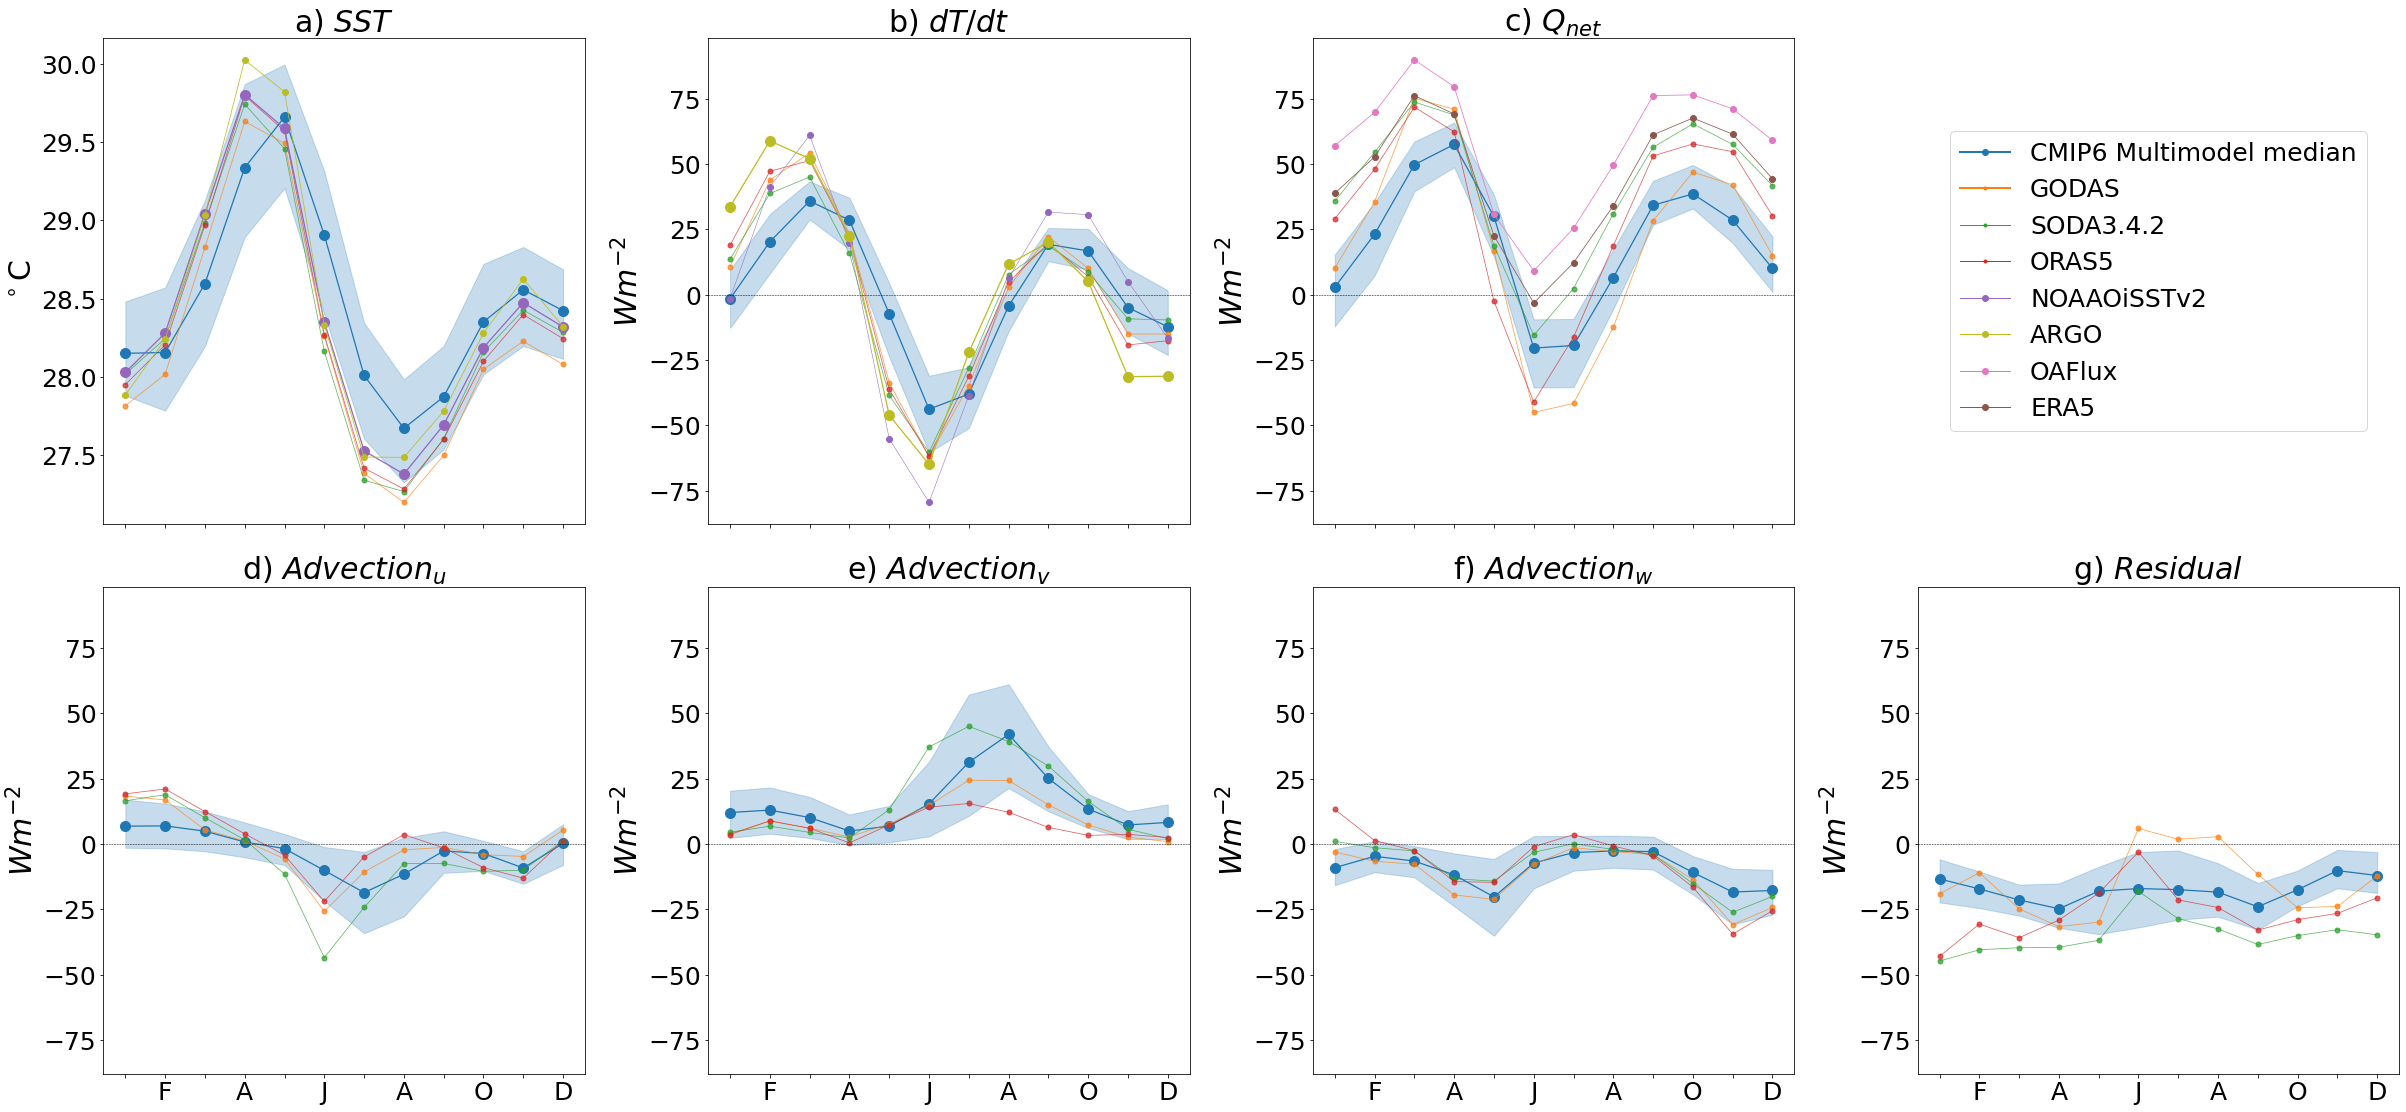

In [19]:
plt.rcParams.update({'font.size': 25})
a = plot_region_MM_new(models1, OBS1, -10, 10, 50, 70)
plt.tight_layout()
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/F_2.png',dpi = 600, pad_inches = 1,  bbox_inches = 'tight', facecolor = 'white')


# Figure 6
Region: SETIO: 10S-Eq, 90-110E

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning

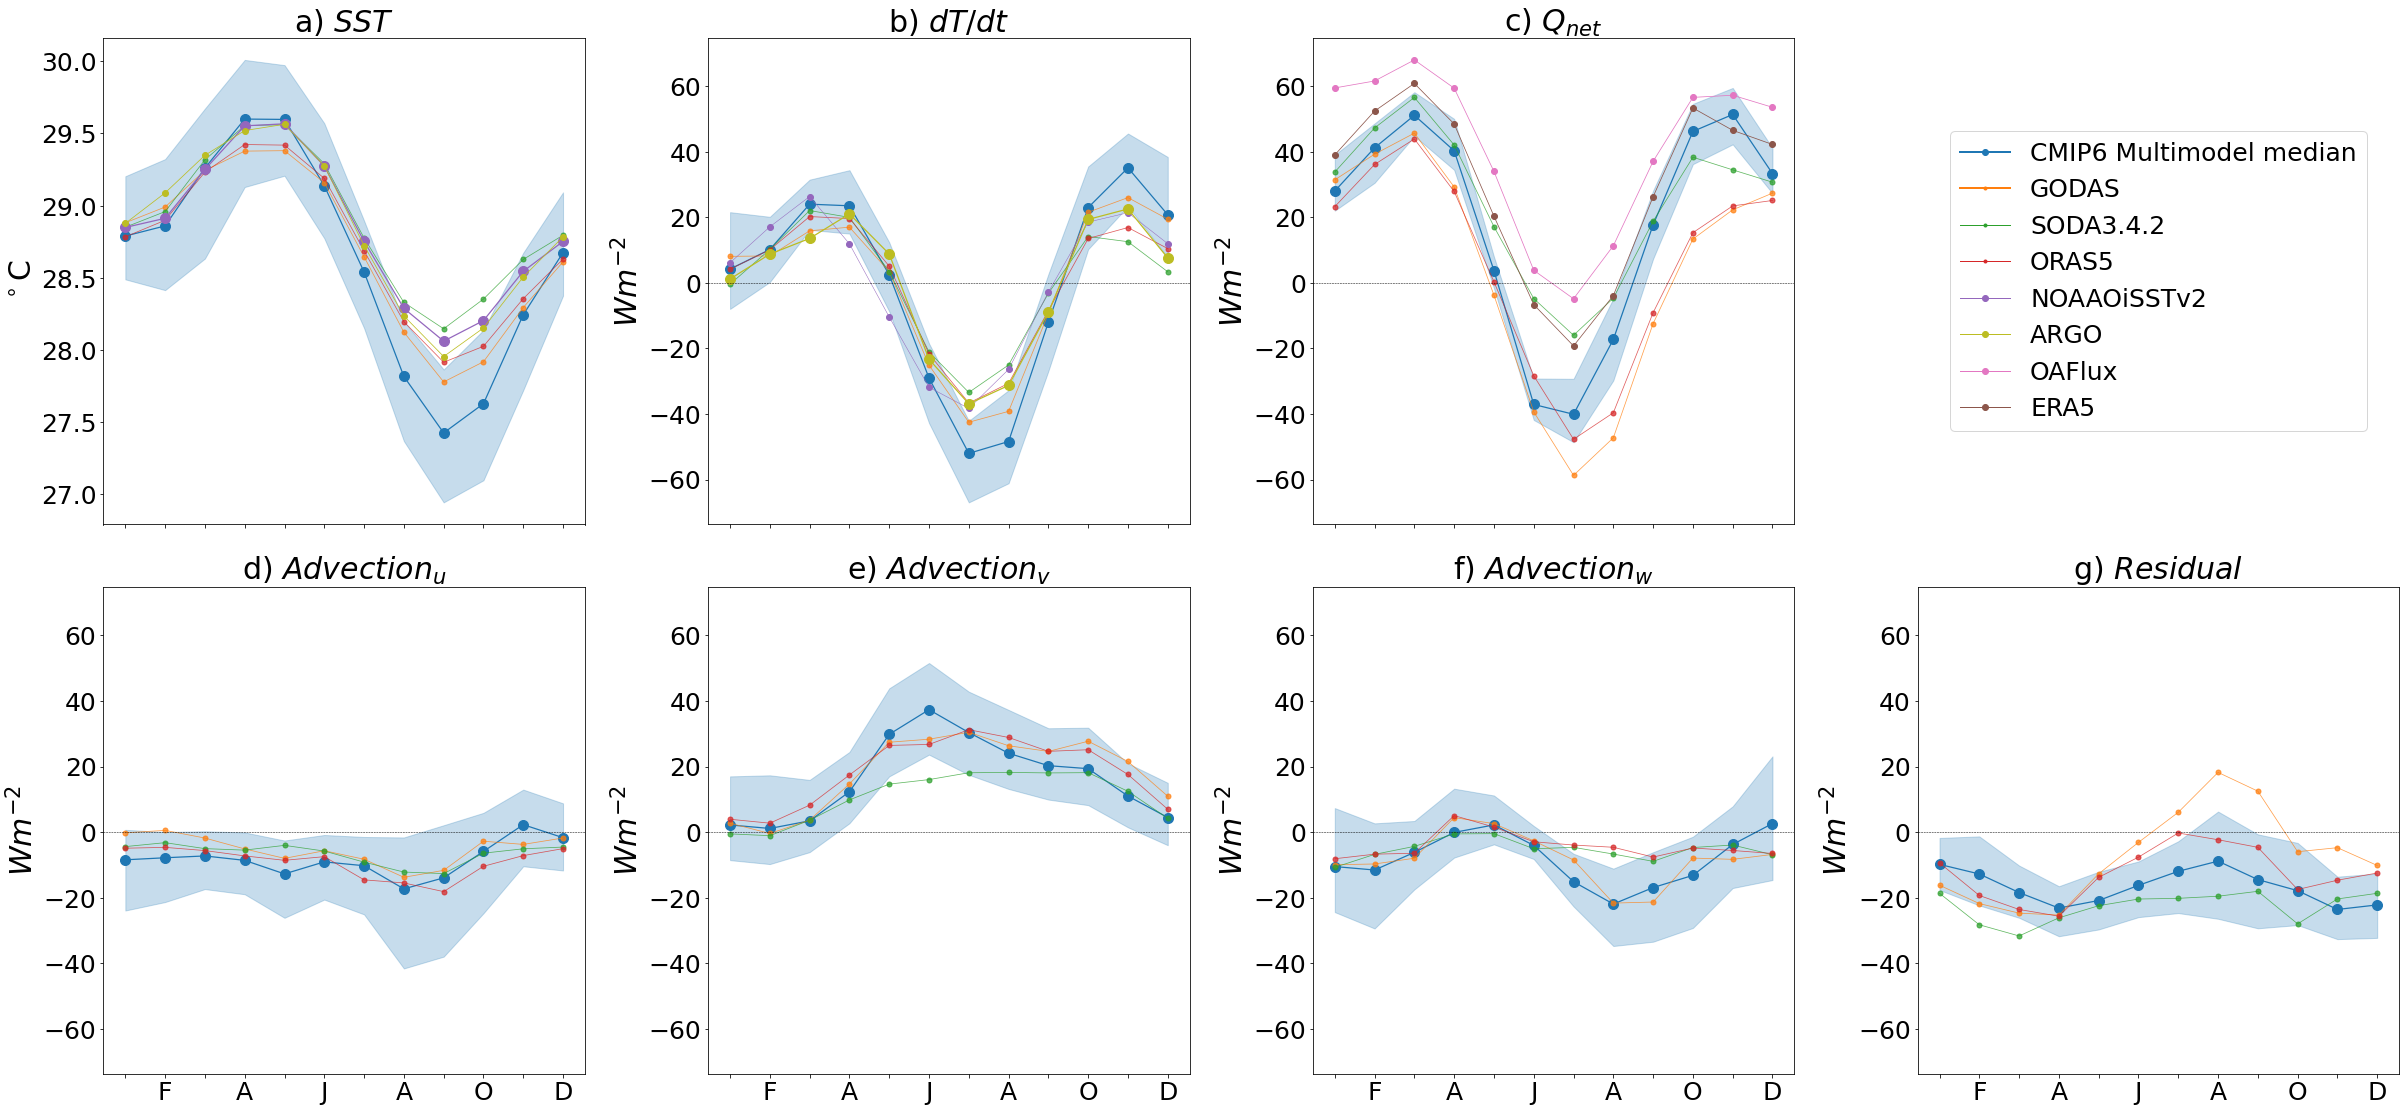

In [20]:
plt.rcParams.update({'font.size': 25})
a = plot_region_MM_new(models1, OBS1, -10, 0, 90, 110)
plt.tight_layout()

# Figure 8
Region: Arabian Sea 10-20N, 50-70E

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning

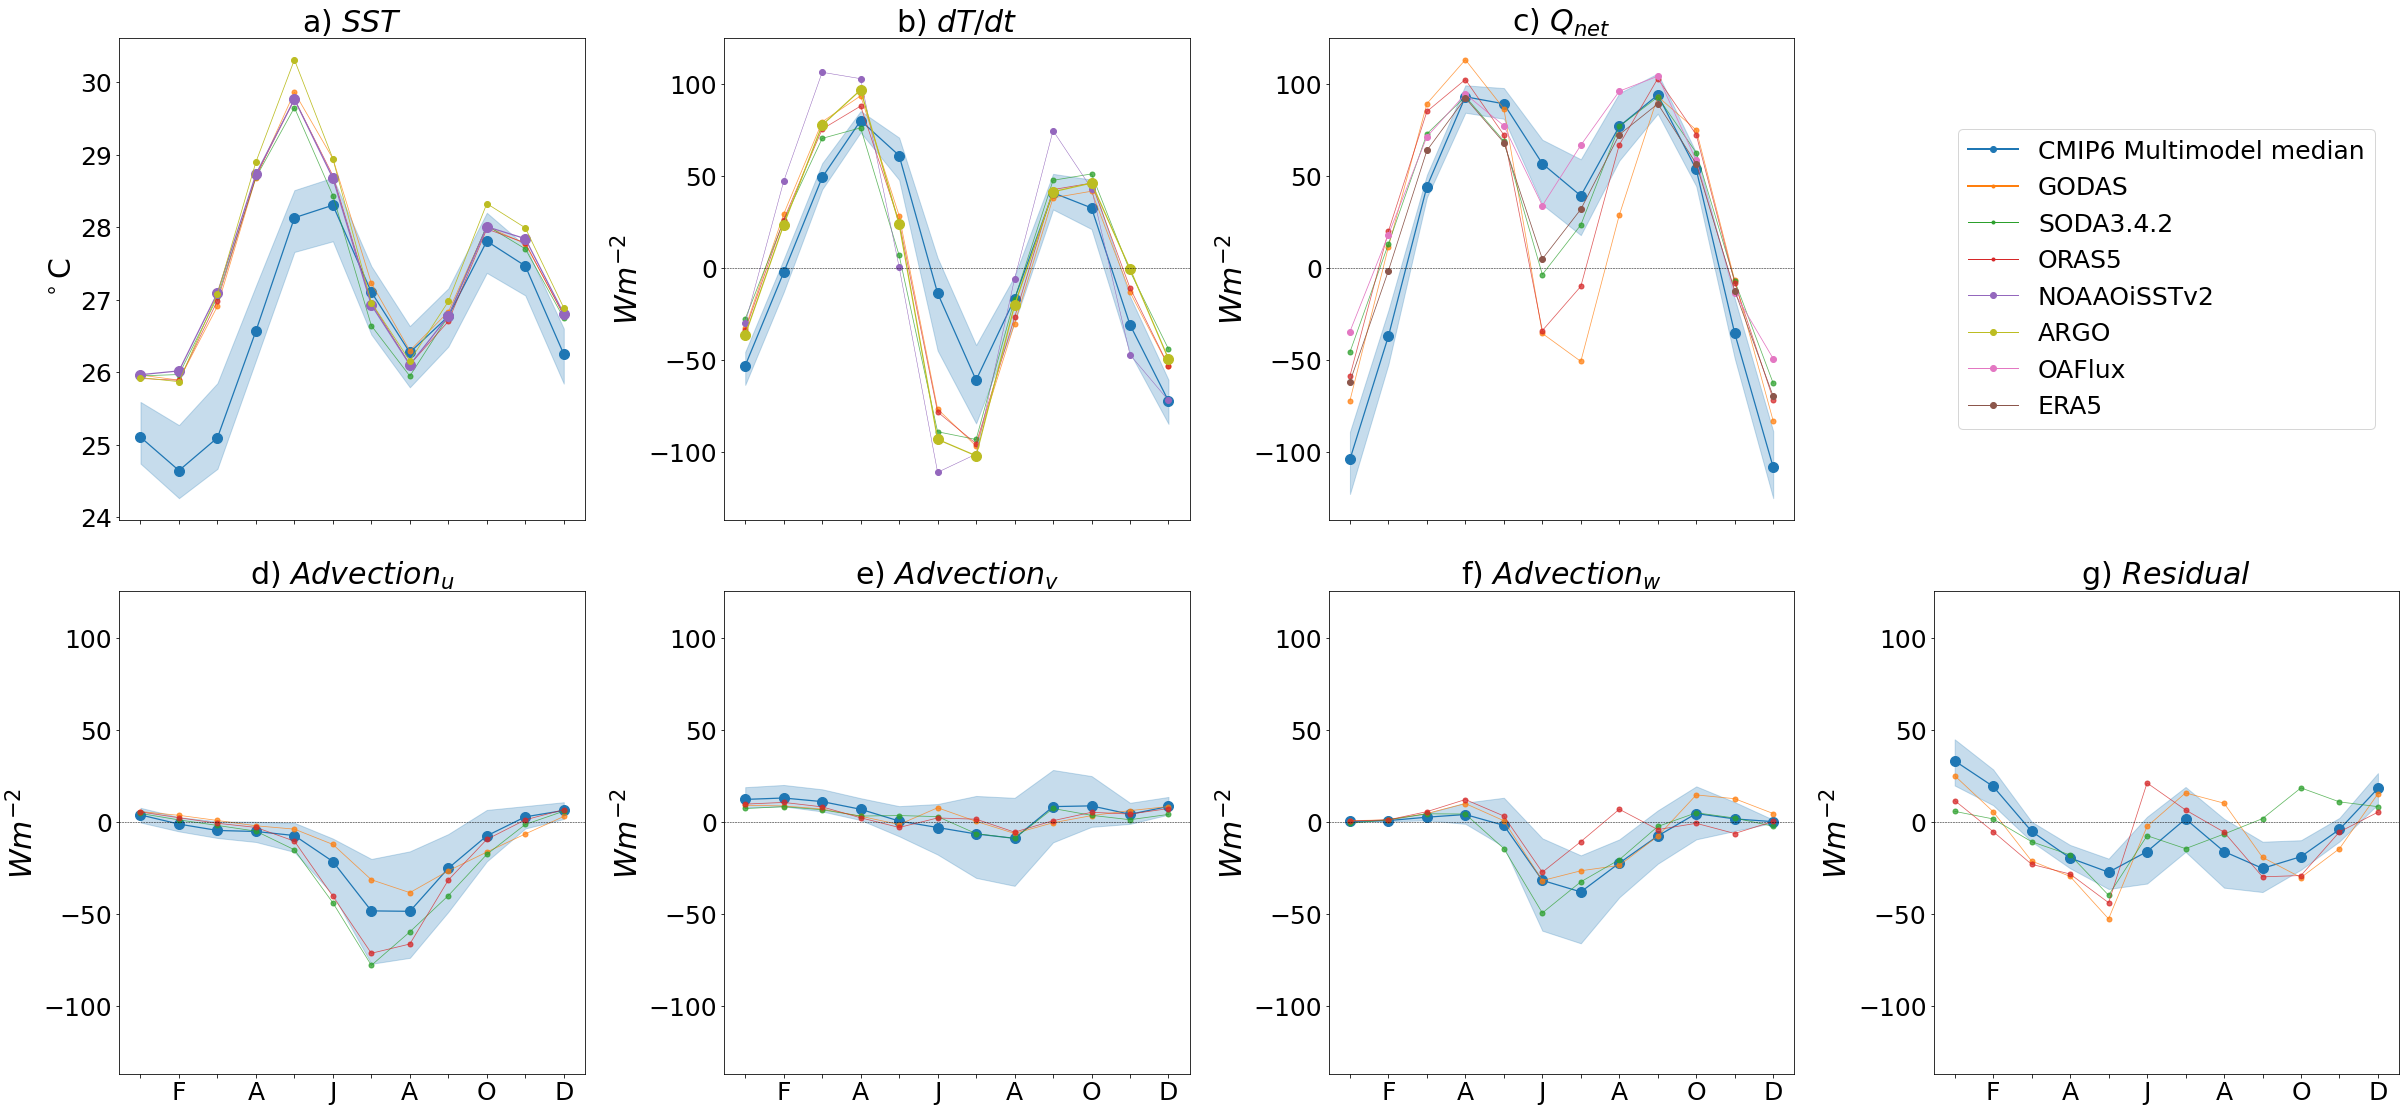

In [21]:
plt.rcParams.update({'font.size': 25})
a = plot_region_MM_new(models1, OBS1, 10, 20, 50, 70)
plt.tight_layout()

# Supplemenary Figure 8
Bay of Bengal: 10-20N, 80-100E

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning

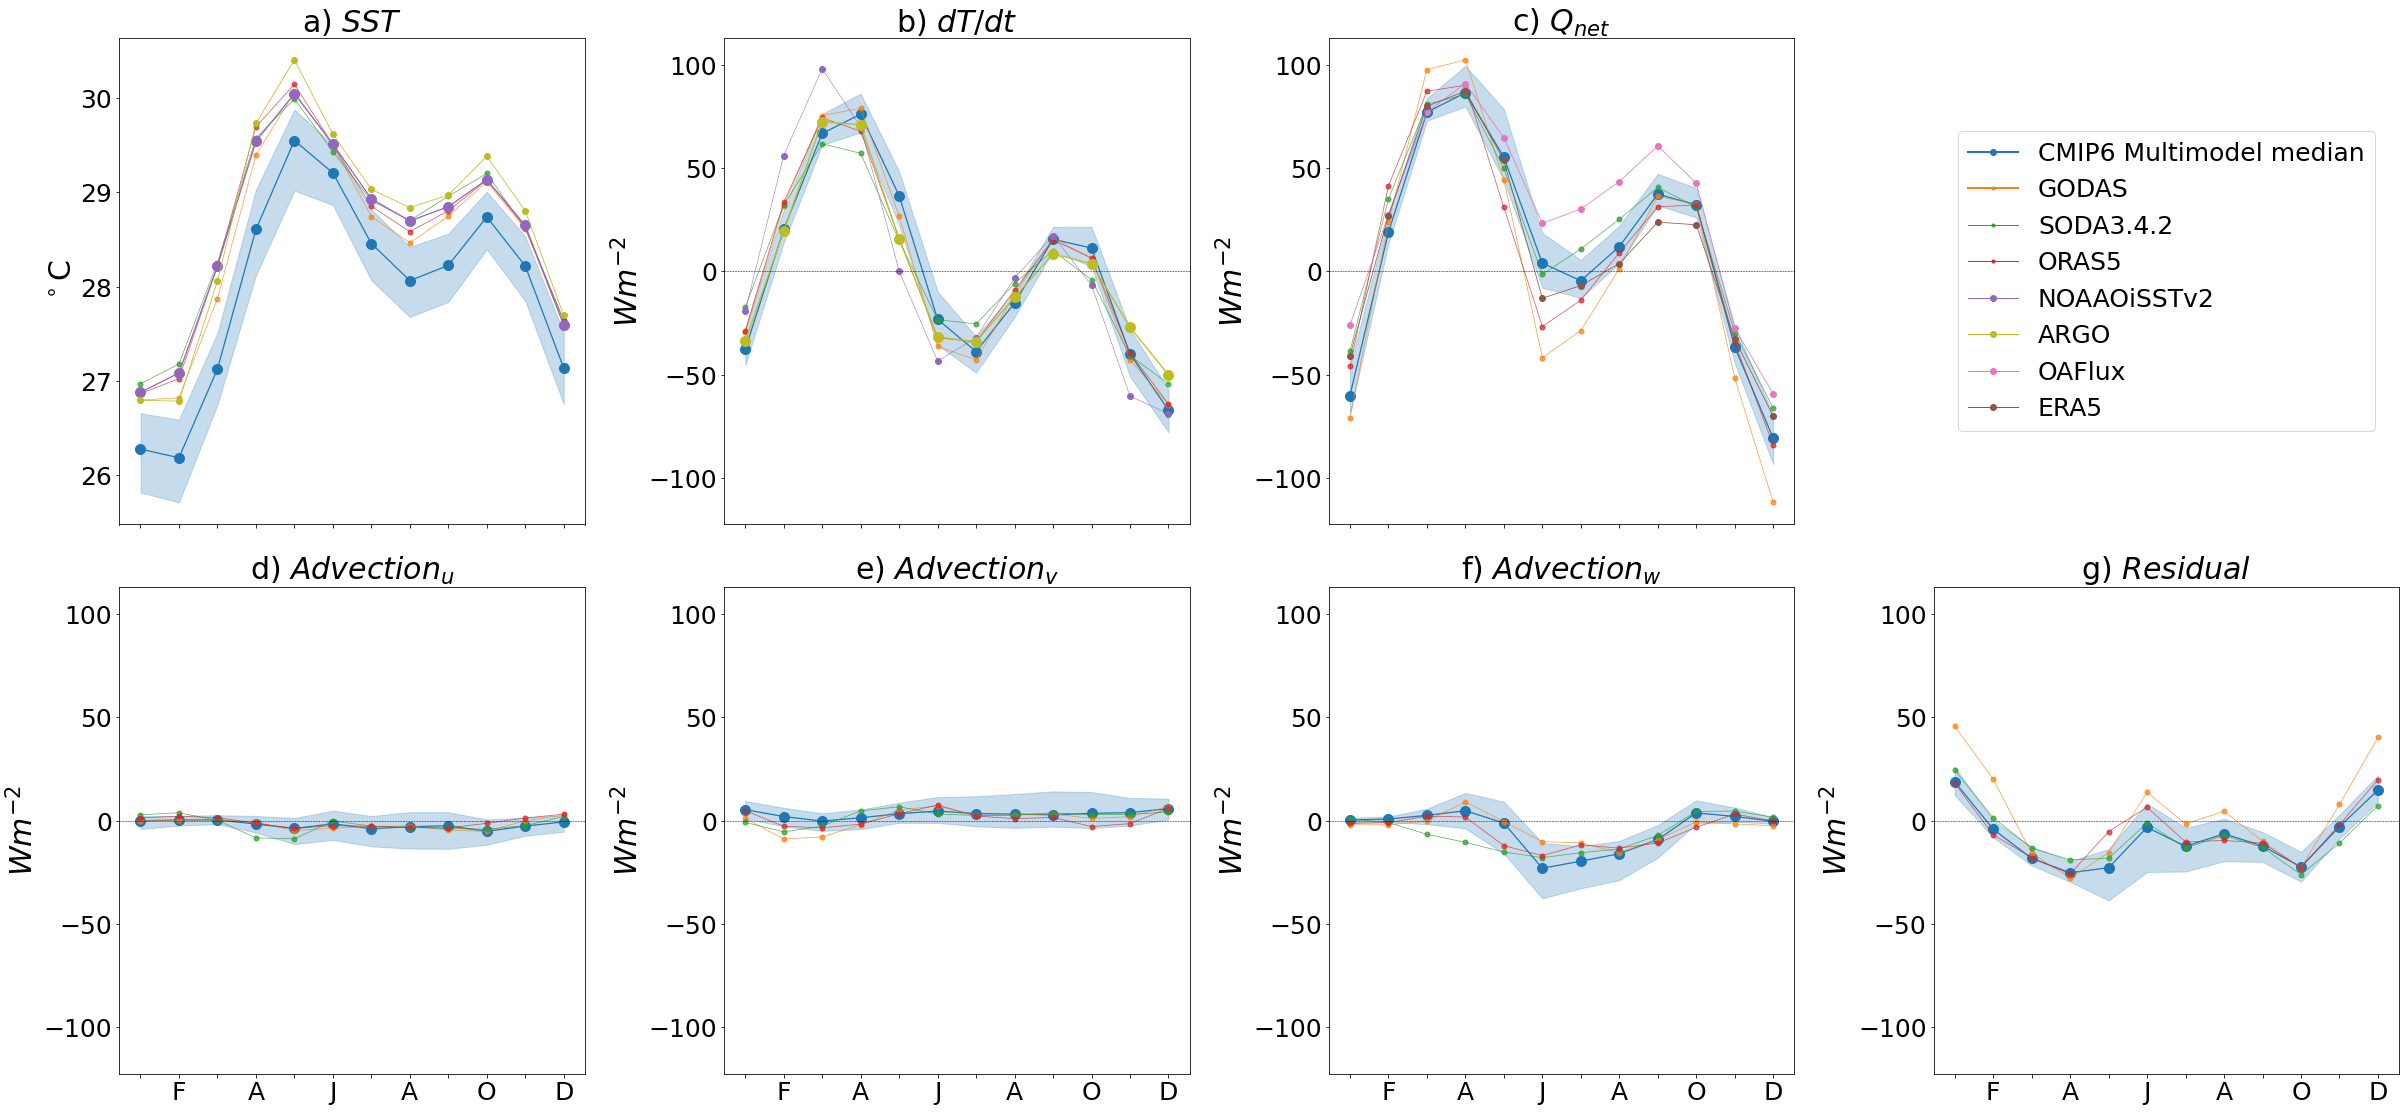

In [22]:
plt.rcParams.update({'font.size': 25})
a = plot_region_MM_new(models1, OBS1, 10, 20, 80, 100)
plt.tight_layout()

# Supplemenary Figure 9
South Indian Ocean: 15-10S, 80-100E

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning

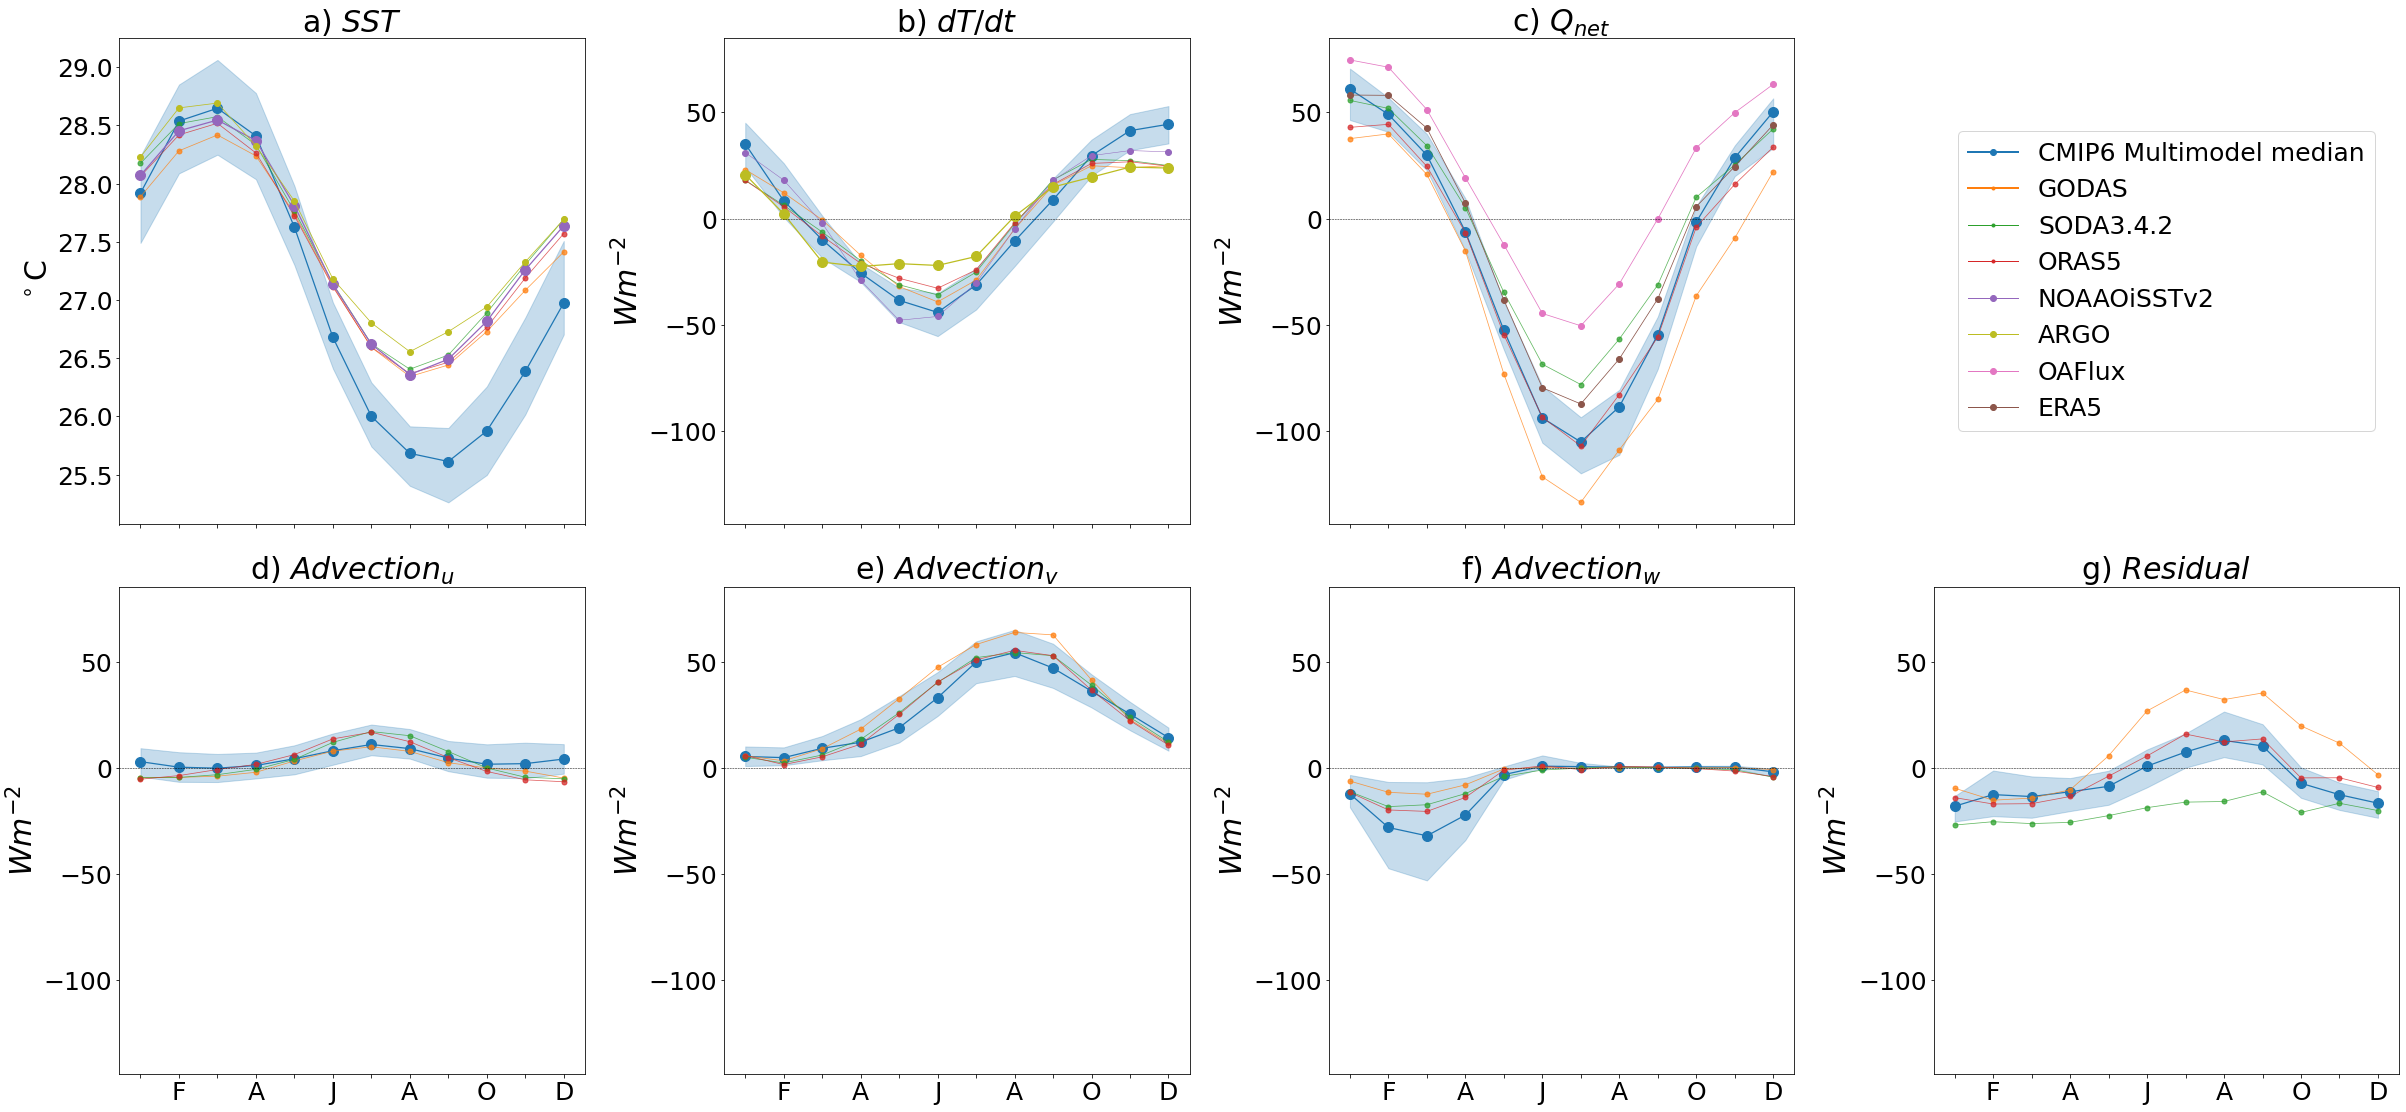

In [23]:
plt.rcParams.update({'font.size': 25})
a = plot_region_MM_new(models1, OBS1, -15, -10, 80, 100)
plt.tight_layout()

# Supplemenary Figure 11
Somali Coast: 10S-10N, 40-60E

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning

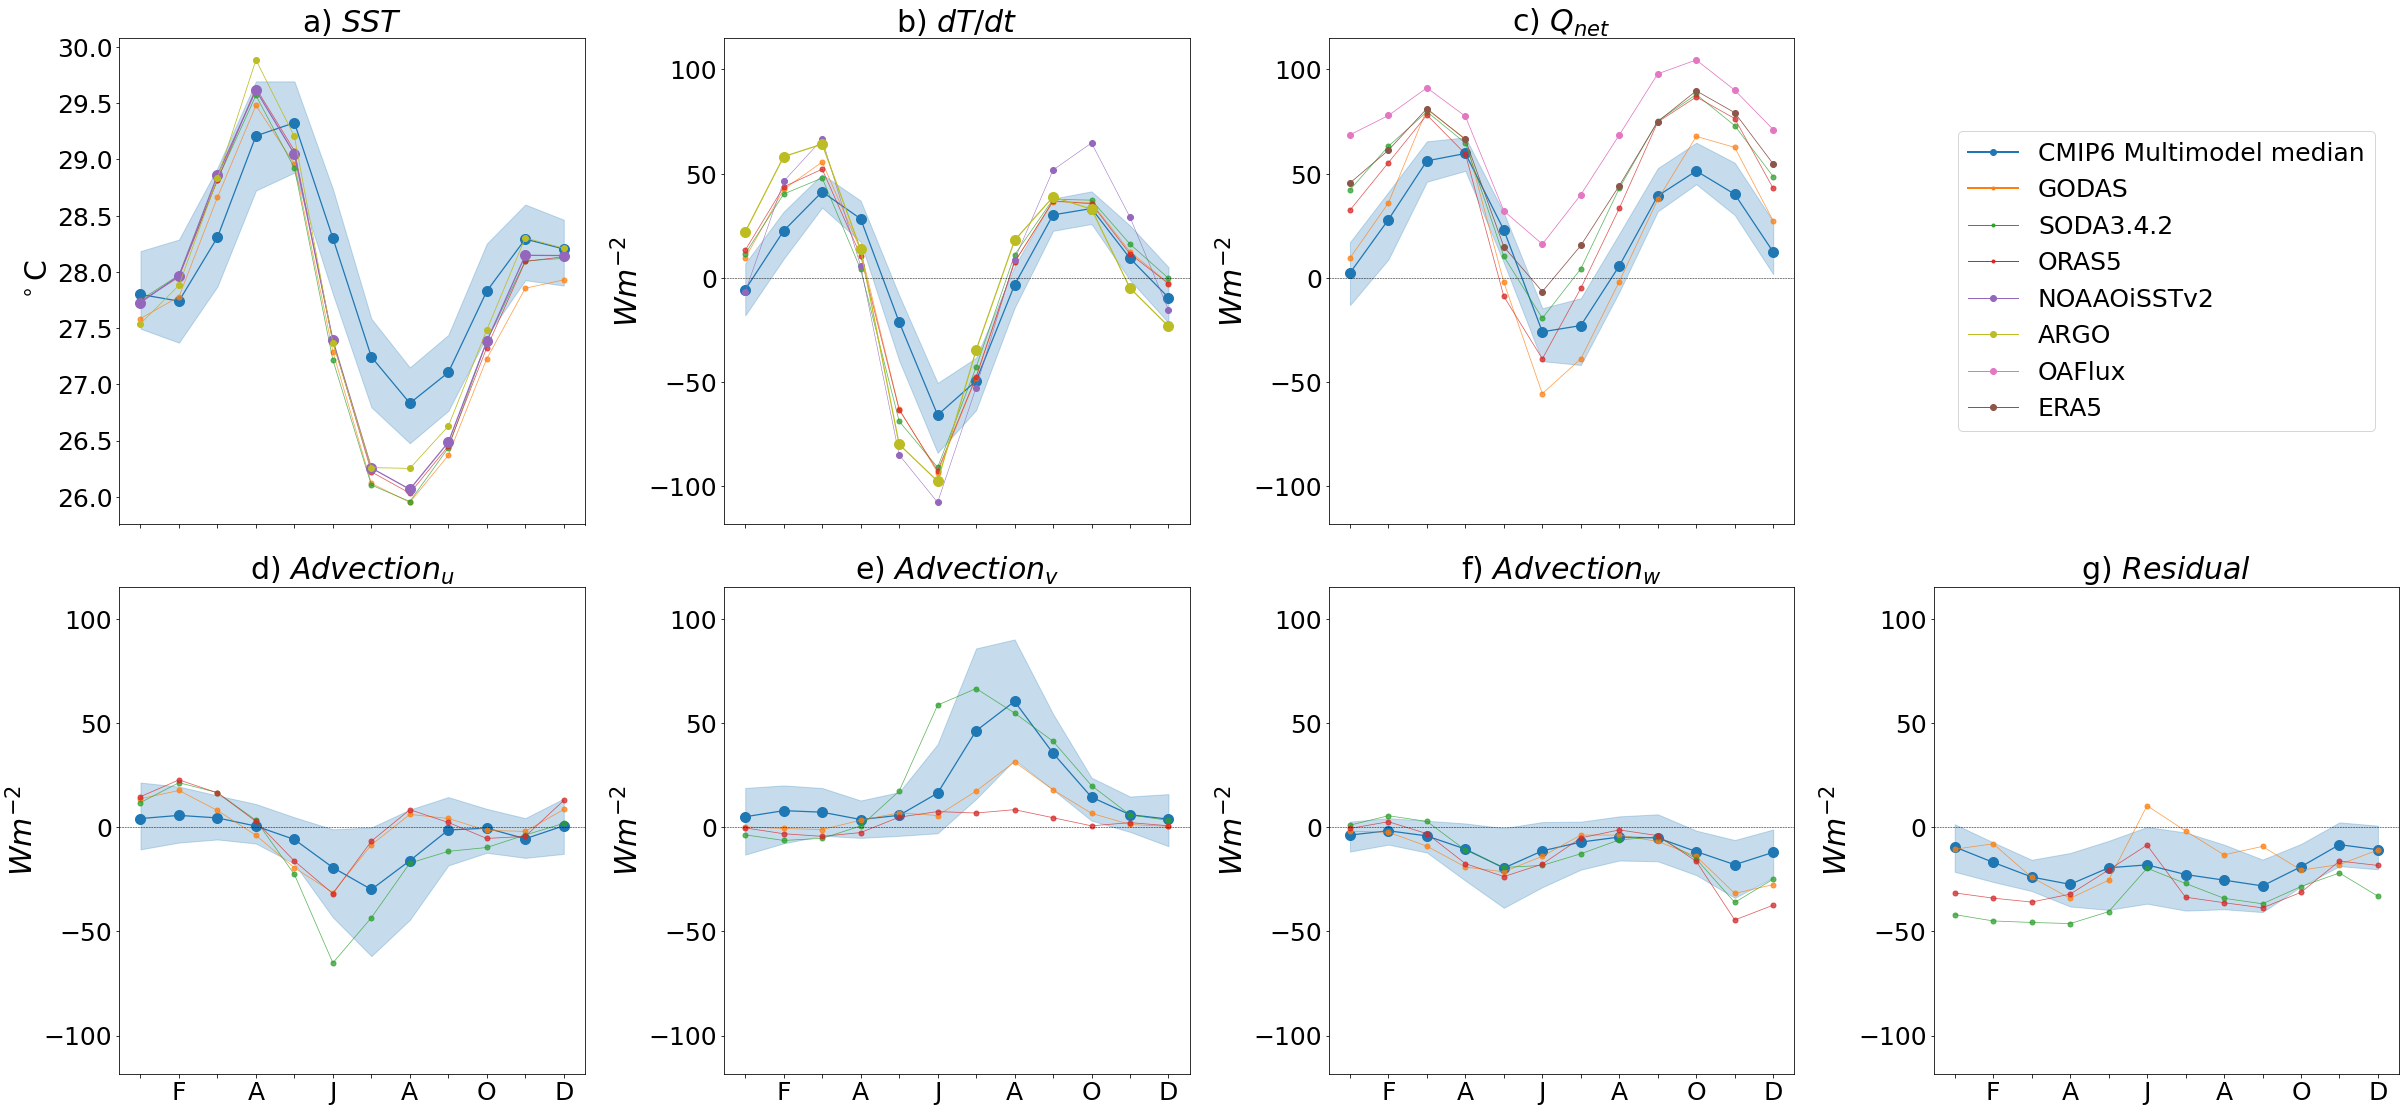

In [24]:
plt.rcParams.update({'font.size': 25})
a = plot_region_MM_new(models1, OBS1, -10, 10, 40, 60)
plt.tight_layout()